In [11]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [2]:
torch.Tensor(5,3)


-4.4197e+14  4.5733e-41 -4.4197e+14
 4.5733e-41  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]

In [3]:
x = torch.rand(4,4)
x


 0.7068  0.0692  0.0981  0.8995
 0.6622  0.1579  0.0415  0.0523
 0.8347  0.3103  0.7856  0.4342
 0.6317  0.6463  0.3340  0.3227
[torch.FloatTensor of size 4x4]

In [4]:
x.view(-1,8)


 0.7068  0.0692  0.0981  0.8995  0.6622  0.1579  0.0415  0.0523
 0.8347  0.3103  0.7856  0.4342  0.6317  0.6463  0.3340  0.3227
[torch.FloatTensor of size 2x8]

In [5]:
y = torch.ones(5)
y


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [6]:
y+3


 4
 4
 4
 4
 4
[torch.FloatTensor of size 5]

In [7]:
y.numpy()

array([1., 1., 1., 1., 1.], dtype=float32)

In [2]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,12,5)
        self.fc1 = nn.Linear(12*5*5,100)
        self.fc2 = nn.Linear(100,10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [9]:
net = CNN()
print(net)

CNN(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=300, out_features=100)
  (fc2): Linear(in_features=100, out_features=10)
)


In [10]:
x = Variable(torch.rand(1,1,32,32))
x

Variable containing:
(0 ,0 ,.,.) = 
  0.1202  0.5217  0.3529  ...   0.6526  0.1188  0.4006
  0.5728  0.0867  0.4566  ...   0.2938  0.6287  0.7627
  0.6232  0.2085  0.7372  ...   0.7554  0.5563  0.4456
           ...             ⋱             ...          
  0.1594  0.9592  0.4313  ...   0.6109  0.3191  0.9550
  0.6911  0.8199  0.3977  ...   0.2507  0.6438  0.5572
  0.5544  0.0756  0.7224  ...   0.6307  0.8358  0.1212
[torch.FloatTensor of size 1x1x32x32]

In [11]:
net(x)

Variable containing:
 0.0654  0.0183 -0.1019  0.0533  0.0171  0.1567 -0.0566 -0.0384  0.0349 -0.0754
[torch.FloatTensor of size 1x10]

In [12]:
target = Variable(torch.rand(1,1,10))
target

Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.8131  0.8305  0.3526  0.0476  0.7365  0.5556  0.3866  0.5201  0.8573

Columns 9 to 9 
   0.1286
[torch.FloatTensor of size 1x1x10]

In [22]:
output = net(x)
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

Variable containing:
 0.3328
[torch.FloatTensor of size 1]

In [23]:
loss.grad_fn

In [24]:
loss.grad_fn.next_functions[0][0]

In [25]:
net.zero_grad()
print(net.conv1.bias.grad)
loss.backward()
print(net.conv1.bias.grad)

Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

Variable containing:
1.00000e-02 *
  0.8082
 -2.2820
  0.0872
  1.0279
  0.4242
  0.0000
[torch.FloatTensor of size 6]



In [8]:
transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
trainset = torchvision.datasets.CIFAR10('./data', train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10('./data', train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


horse   cat   car  bird


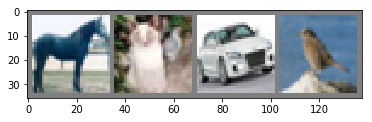

In [17]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,12,5)
        self.fc1 = nn.Linear(12*5*5,100)
        self.fc2 = nn.Linear(100,10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = CNN()

In [21]:
criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(net.parameters())

In [24]:
for epoch in range(5):
    runnin_loss = 0.
    for inputs, labels in trainloader:
        inputs, labels = Variable(inputs), Variable(labels)
        optimiser.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()
        
    print(loss)
print('Finished')

Variable containing:
 1.7315
[torch.FloatTensor of size 1]

Variable containing:
 1.3293
[torch.FloatTensor of size 1]

Variable containing:
 1.2527
[torch.FloatTensor of size 1]

Variable containing:
 1.0836
[torch.FloatTensor of size 1]

Variable containing:
 1.3939
[torch.FloatTensor of size 1]

Finished


GroundTruth:    cat   cat  ship   cat


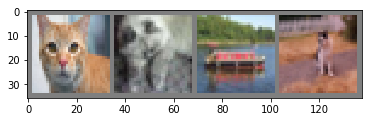

In [26]:
images, labels = iter(testloader).next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [27]:
o = net(Variable(images))

In [28]:
_, predicted = torch.max(o.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog  bird plane  deer


In [29]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 73 %
Accuracy of   car : 73 %
Accuracy of  bird : 38 %
Accuracy of   cat : 37 %
Accuracy of  deer : 59 %
Accuracy of   dog : 52 %
Accuracy of  frog : 78 %
Accuracy of horse : 71 %
Accuracy of  ship : 57 %
Accuracy of truck : 78 %
